In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from scipy . optimize import minimize
from scipy import linalg

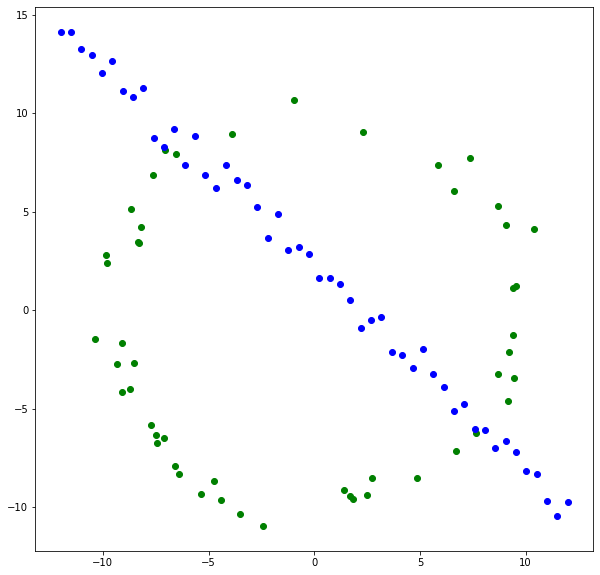

In [116]:
np.random.seed(0)
N = 100
half_n = N//2
r = 10
s = r/16
t = np.random.uniform(0, 2*np.pi, half_n)
n = s*np.random.randn(half_n)
x1, y1 = (r+n)*np.cos(t), (r+n)*np.sin(t)

fig, ax = plt.subplots(1,1,figsize=(10,10))
ax.scatter(x1, y1, color='g')
X_circ = np.hstack((x1.reshape(half_n, 1), y1.reshape(half_n, 1 )))

m, b = -1, 2
x2 = np.linspace(-12, 12, half_n)
y2 = m*x2 + b + s*np.random.randn(half_n)
X_line = np.hstack((x2.reshape(half_n, 1), y2.reshape(half_n, 1)))
X = np.vstack((X_circ, X_line))

ax.scatter(x2, y2, color='b')

In [135]:
print(len(x))
print(len(x1))
print(len(x2))




100
50
50


In [141]:
# Coordinates of the 2D points
x = [9,2,-13]
y = [34,10,6]

#x = np.concatenate([x1,x2])
#y = np.concatenate([y1,y2])

# coordinates of the barycenter
x_m = np.mean(x)
y_m = np.mean(y)

# calculation of the reduced coordinates
u = x - x_m
v = y - y_m

# linear system defining the center in reduced coordinates (uc, vc):
#    Suu * uc +  Suv * vc = (Suuu + Suvv)/2
#    Suv * uc +  Svv * vc = (Suuv + Svvv)/2
Suv  = sum(u*v)
Suu  = sum(u**2)
Svv  = sum(v**2)
Suuv = sum(u**2 * v)
Suvv = sum(u * v**2)
Suuu = sum(u**3)
Svvv = sum(v**3)

# Solving the linear system
A = np.array([ [ Suu, Suv ], [Suv, Svv]])
B = np.array([ Suuu + Suvv, Svvv + Suuv ])/2.0
uc, vc = linalg.solve(A, B)

xc_1 = x_m + uc
yc_1 = y_m + vc

# Calculation of all distances from the center (xc_1, yc_1)
Ri_1      = np.sqrt((x-xc_1)**2 + (y-yc_1)**2)
R_1       = np.mean(Ri_1)
residu_1  = sum((Ri_1-R_1)**2)
residu2_1 = sum((Ri_1**2-R_1**2)**2)

# Decorator to count functions calls
# import functools
# def countcalls(fn):
#     "decorator function count function calls "

#     @functools.wraps(fn)
#     def wrapped(*args):
#         wrapped.ncalls +=1
#         return fn(*args)

#     wrapped.ncalls = 0
#     return wrapped

In [142]:
print(xc_1)
print(yc_1)
print(R_1)

cen = (xc_1,yc_1)

-10.47590361445784
26.659638554216873
20.813258460759844


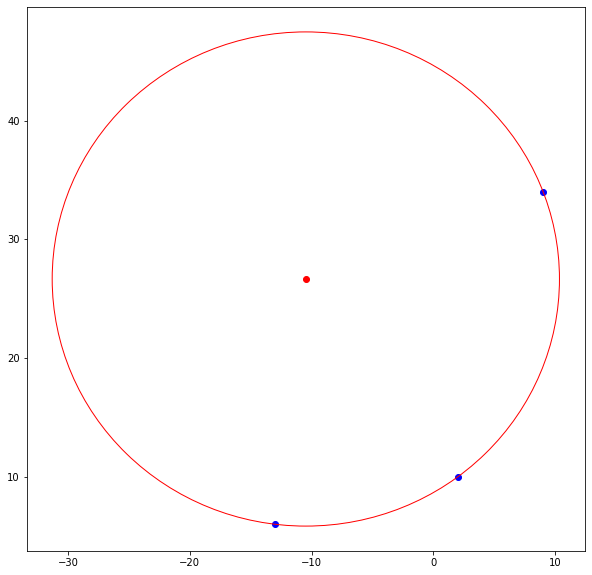

In [143]:
fig, ax2 = plt.subplots(1,1,figsize=(10,10))
circle = plt.Circle((xc_1, yc_1), R_1, color='r',fill=False)
ax2.scatter(x, y, color='b')
ax2.scatter(xc_1,yc_1,color='r')
ax2.add_patch(circle)